In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (17, 9)})


In [2]:
df = pd.read_csv("results.csv")

In [3]:
df.head()

,Unnamed: 0,PM1,PM2,EOS,M1,M2,SHFT,SNR,combined,DiffM1,DiffM2,totDiff,avgDiff
0,0,1.391614,1.362671,18.0,1.350001,1.350001,-20.0,0.000780,2.700002,0.041613,0.012670,0.054283,0.027142
1,1,1.469614,1.411028,16.0,1.349998,1.349998,0.0,0.000105,2.699996,0.119616,0.061030,0.180647,0.090323
2,2,1.388389,1.365665,16.0,1.350000,1.350000,90.0,0.000205,2.700000,0.038389,0.015665,0.054054,0.027027
3,3,1.388491,1.403896,16.0,1.350502,1.350502,70.0,0.000630,2.701004,0.037989,0.053394,0.091383,0.045691
4,4,1.500259,1.285840,6.0,1.486000,1.254000,90.0,0.000505,2.740000,0.014259,0.031840,0.046098,0.023049


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

[Text(0.5, 1.0, 'Difference between predicted and actual masses'),
 Text(0.5, 0, 'Difference (solar masses)'),
 Text(0, 0.5, 'Count')]

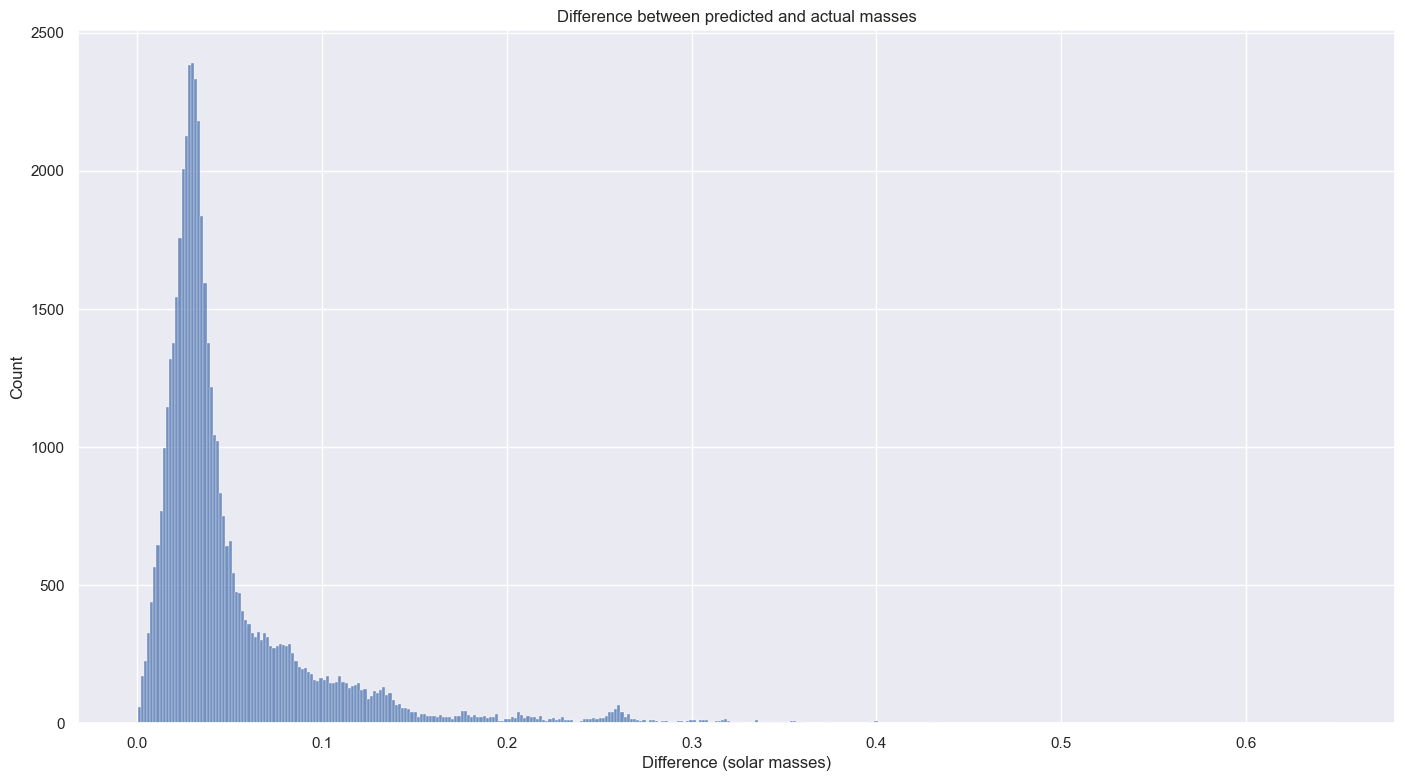

In [5]:
diffhist = sns.histplot(df["avgDiff"])
diffhist.set(
    title="Difference between predicted and actual masses",
    xlabel="Difference (solar masses)",
    ylabel="Count",
)

<AxesSubplot:xlabel='combined', ylabel='avgDiff'>

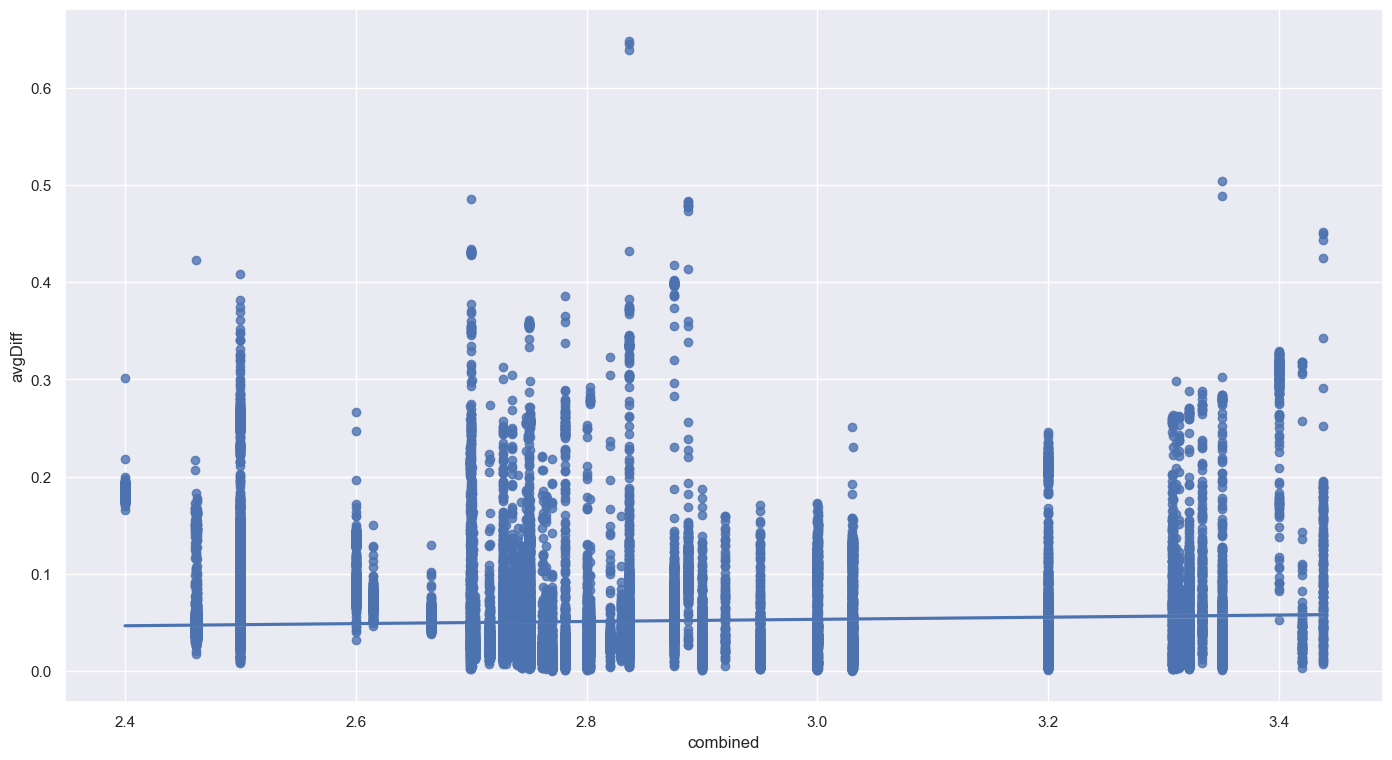

In [6]:
sns.regplot(x=df["combined"], y=df["avgDiff"])

<AxesSubplot:xlabel='M1', ylabel='DiffM1'>

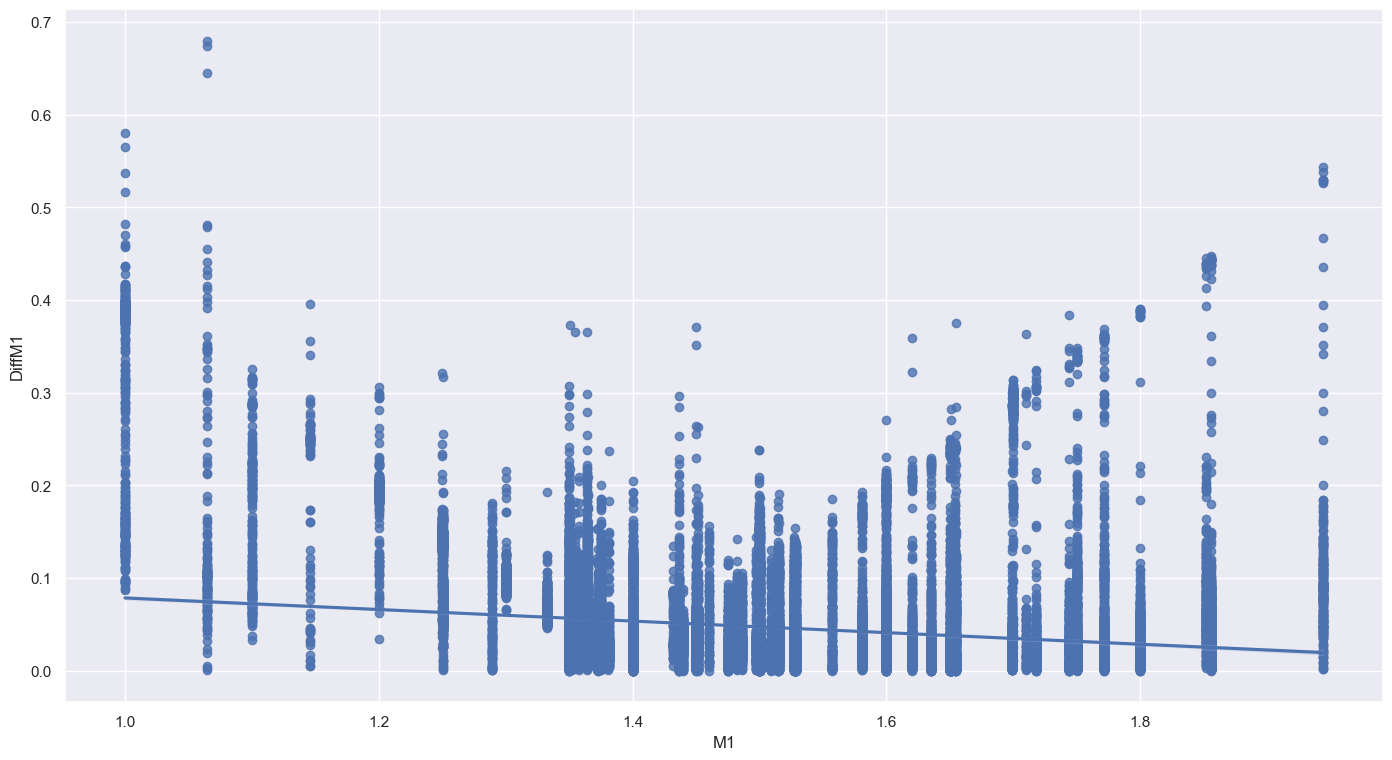

In [7]:
sns.regplot(x=df["M1"], y=df["DiffM1"])

<AxesSubplot:xlabel='M2', ylabel='DiffM2'>

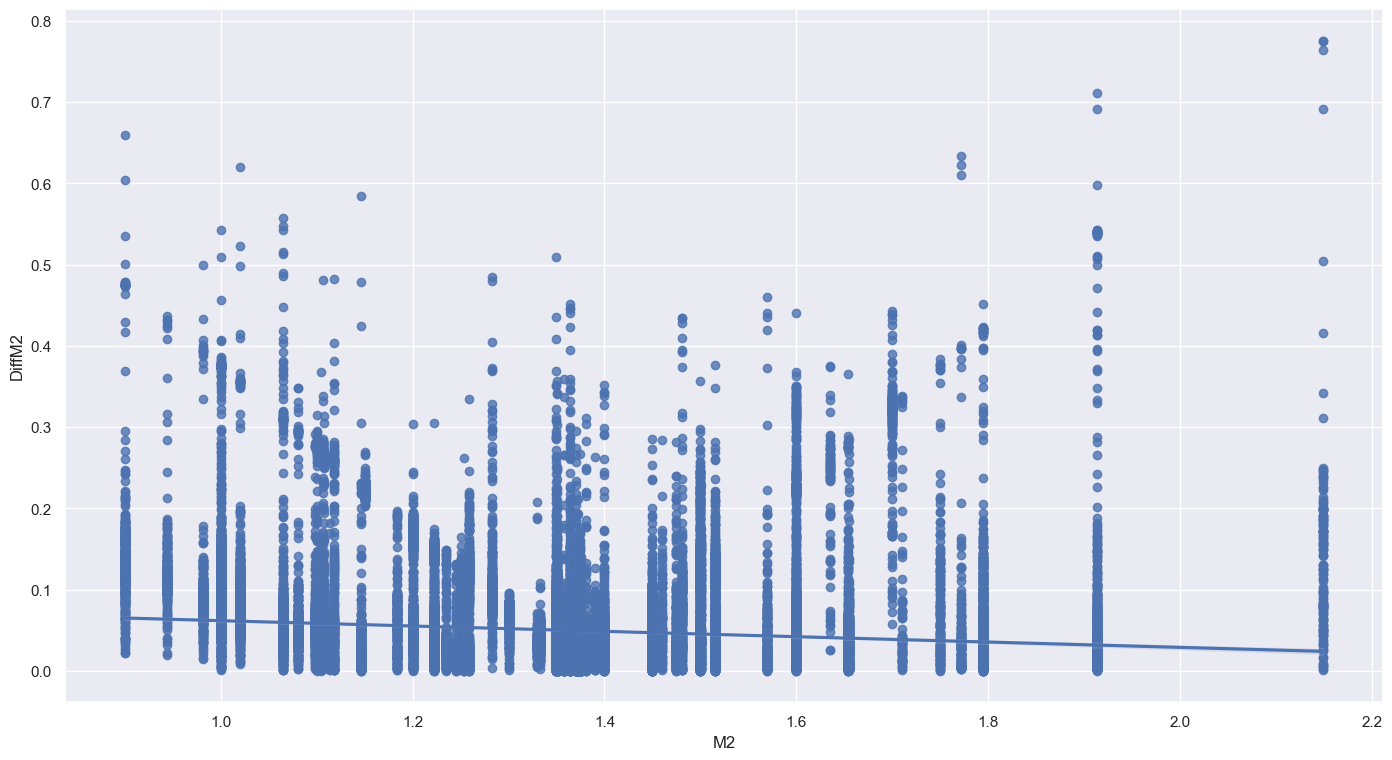

In [8]:
sns.regplot(x=df["M2"], y=df["DiffM2"])

[Text(0.5, 1.0, 'Correalation betweeen the Difference in M1 and Difference in M2'),
 Text(0.5, 0, 'Difference in Mass 1'),
 Text(0, 0.5, 'Diference in Mass 2')]

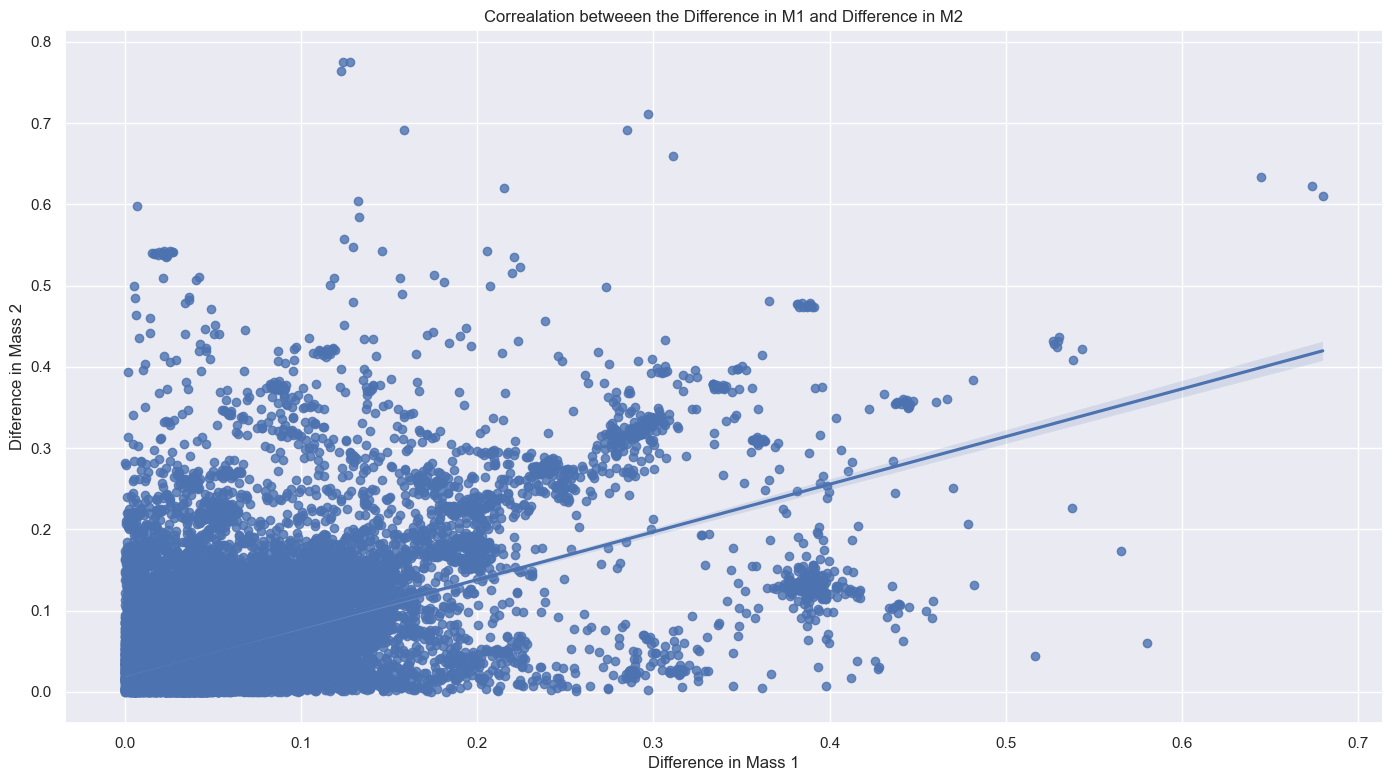

In [10]:
a = sns.regplot(data = df, x = "DiffM1", y = "DiffM2")
a.set(
    title = "Correalation betweeen the Difference in M1 and Difference in M2",
    xlabel = "Difference in Mass 1",
    ylabel = "Diference in Mass 2"
)

In [11]:
df

,Unnamed: 0,PM1,PM2,EOS,M1,M2,SHFT,SNR,combined,DiffM1,DiffM2,totDiff,avgDiff
0,0,1.391614,1.362671,18.0,1.350001,1.350001,-20.0,0.000780,2.700002,0.041613,0.012670,0.054283,0.027142
1,1,1.469614,1.411028,16.0,1.349998,1.349998,0.0,0.000105,2.699996,0.119616,0.061030,0.180647,0.090323
2,2,1.388389,1.365665,16.0,1.350000,1.350000,90.0,0.000205,2.700000,0.038389,0.015665,0.054054,0.027027
3,3,1.388491,1.403896,16.0,1.350502,1.350502,70.0,0.000630,2.701004,0.037989,0.053394,0.091383,0.045691
4,4,1.500259,1.285840,6.0,1.486000,1.254000,90.0,0.000505,2.740000,0.014259,0.031840,0.046098,0.023049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49555,49555,1.400447,1.346583,16.0,1.349998,1.349998,60.0,0.000505,2.699996,0.050449,0.003415,0.053864,0.026932
49556,49556,1.387077,1.359112,14.0,1.350398,1.350398,-40.0,0.000705,2.700796,0.036679,0.008714,0.045393,0.022697
49557,49557,1.382319,1.363875,14.0,1.375449,1.375449,-20.0,0.000305,2.750898,0.006870,0.011574,0.018444,0.009222
49558,49558,1.166975,1.813129,15.0,1.065000,1.772000,-30.0,0.000455,2.837000,0.101975,0.041129,0.143103,0.071552


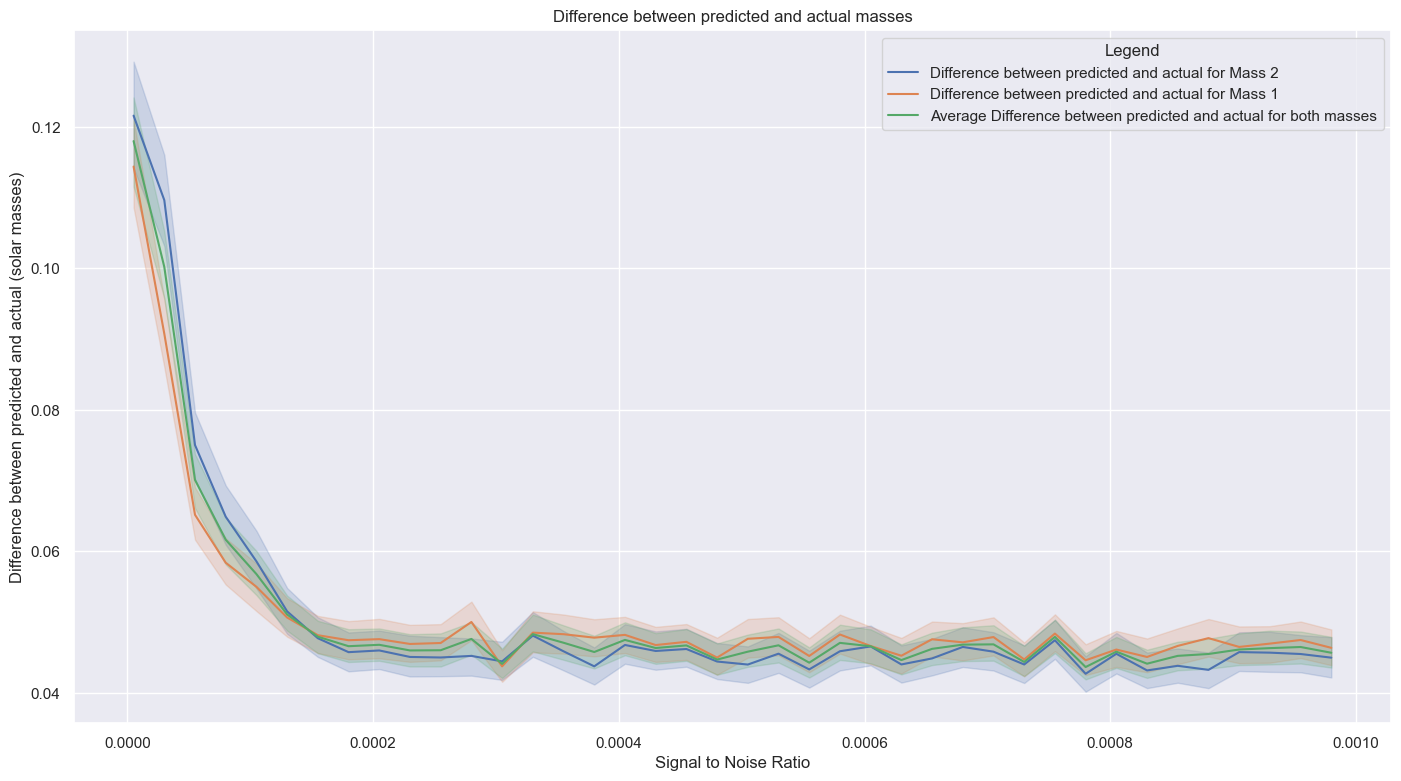

In [12]:
temparray = pd.melt(
    df[["SNR", "DiffM2", "DiffM1", "avgDiff"]].rename(
        columns={
            "SNR": "Signal to Noise Ratio",
            "DiffM2": "Difference between predicted and actual for Mass 2",
            "DiffM1": "Difference between predicted and actual for Mass 1",
            "avgDiff": "Average Difference between predicted and actual for both masses",
        }
    ),
    id_vars=["Signal to Noise Ratio"],
)
a = sns.lineplot(data=temparray, x="Signal to Noise Ratio", y="value", hue="variable")
a.set(
    title="Difference between predicted and actual masses",
    xlabel="Signal to Noise Ratio",
    ylabel="Difference between predicted and actual (solar masses)",
)
new_title = "Legend:"
# replace labels
plt.legend(title="Legend", loc="upper right")
sns.set(rc={"figure.figsize": (16, 9)})

[Text(0.5, 1.0, 'Difference between predicted and actual masses'),
 Text(0.5, 0, 'Combined Mass (solar masses)'),
 Text(0, 0.5, 'Difference between predicted and actual (solar masses)')]

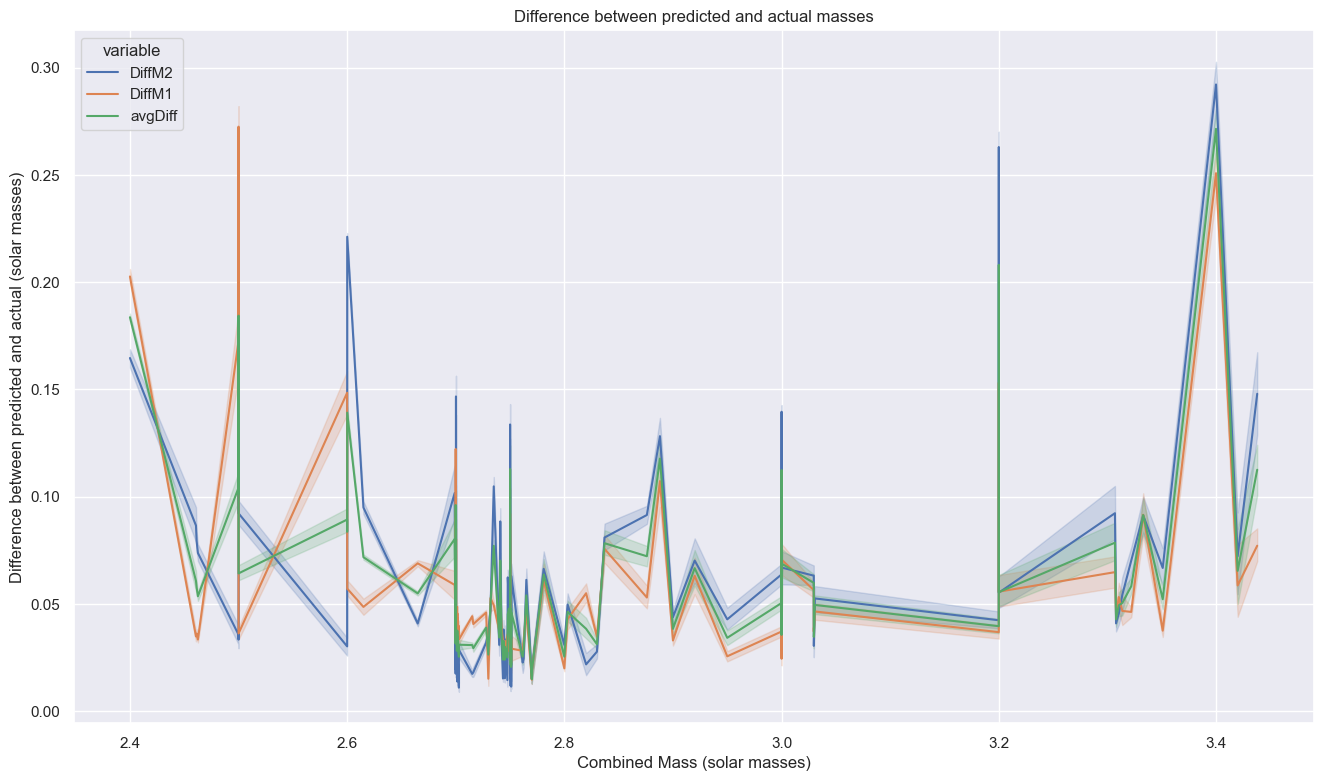

In [13]:
a = sns.lineplot(
    data=pd.melt(df[["combined", "DiffM2", "DiffM1", "avgDiff"]], id_vars=["combined"]),
    x="combined",
    y="value",
    hue="variable",
)
a.set(
    title="Difference between predicted and actual masses",
    xlabel="Combined Mass (solar masses)",
    ylabel="Difference between predicted and actual (solar masses)",
)

[Text(0.5, 1.0, 'Difference between predicted and actual masses vs EOS'),
 Text(0.5, 0, 'Equation of State'),
 Text(0, 0.5, 'Difference between predicted and actual (solar masses)')]

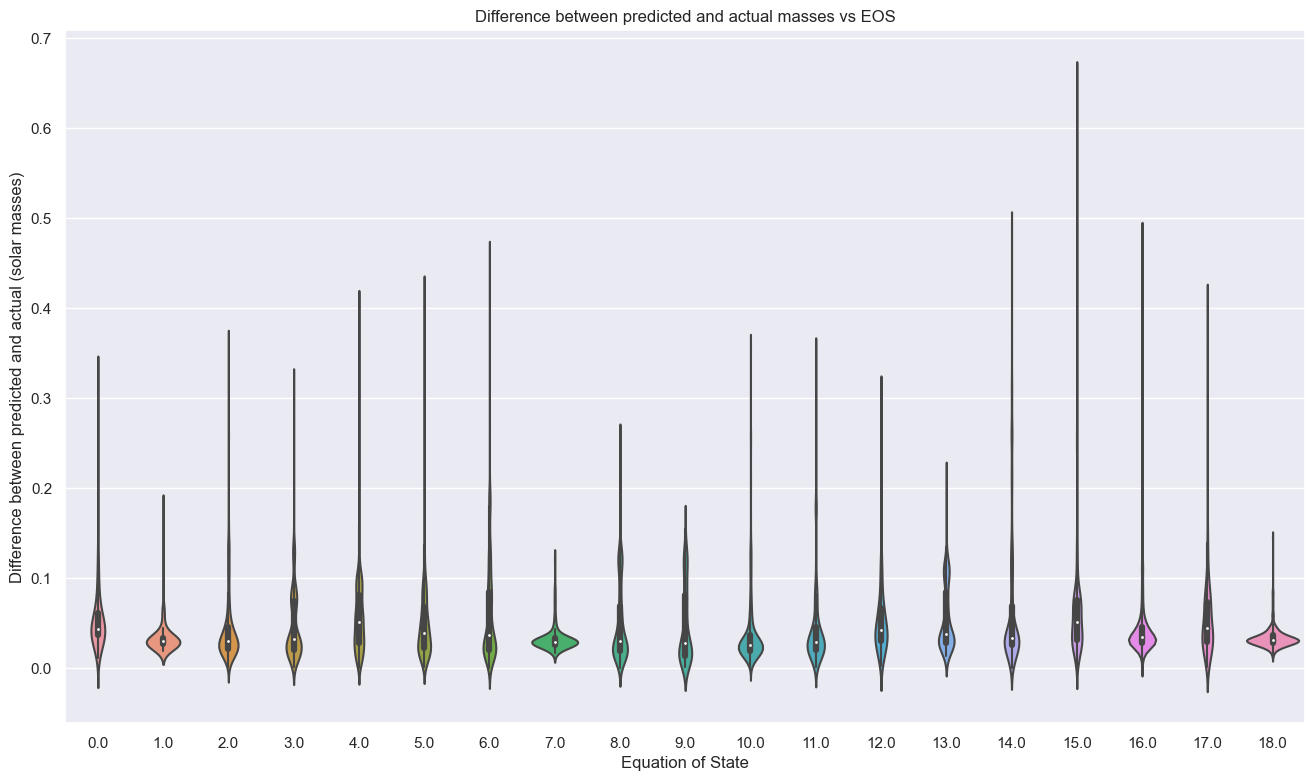

In [14]:
a = sns.violinplot(x=df["EOS"], y=df["avgDiff"])
a.set(
    title="Difference between predicted and actual masses vs EOS",
    xlabel="Equation of State",
    ylabel="Difference between predicted and actual (solar masses)",
)

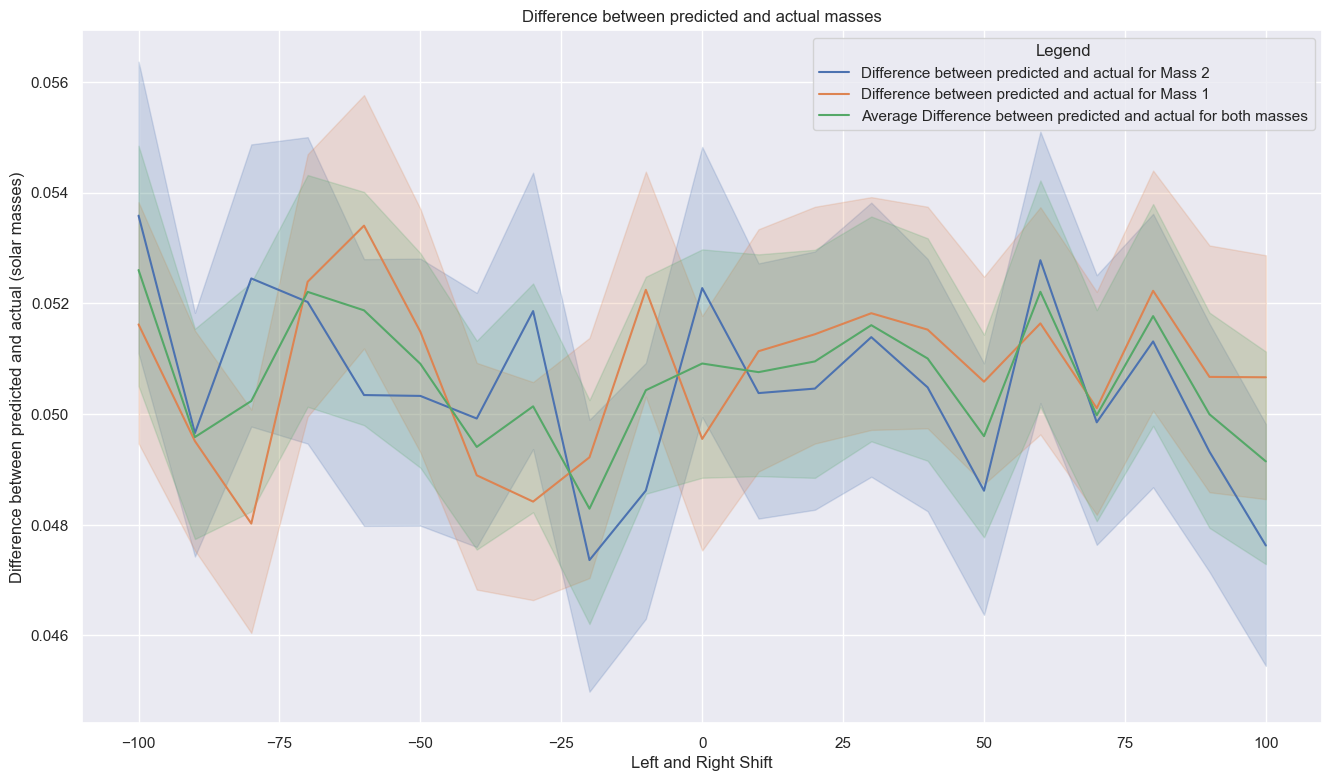

In [15]:
temparray = pd.melt(
    df[["SHFT", "DiffM2", "DiffM1", "avgDiff"]].rename(
        columns={
            "SHFT": "Left and Right Shift",
            "DiffM2": "Difference between predicted and actual for Mass 2",
            "DiffM1": "Difference between predicted and actual for Mass 1",
            "avgDiff": "Average Difference between predicted and actual for both masses",
        }
    ),
    id_vars=["Left and Right Shift"],
)
a = sns.lineplot(data=temparray, x="Left and Right Shift", y="value", hue="variable")
a.set(
    title="Difference between predicted and actual masses",
    xlabel="Left and Right Shift",
    ylabel="Difference between predicted and actual (solar masses)",
)
new_title = "Legend:"
# replace labels
plt.legend(title="Legend", loc="upper right")
sns.set(rc={"figure.figsize": (16, 9)})